In [1]:
import numpy as np
from scipy.io import wavfile
from matplotlib import pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.fft import rfft, rfftfreq

In [2]:
SAMPLE_RATE = 44100
DURATION = 5

def generate_sine_wave(freq, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate*duration, endpoint=False)
    frequencies = x*freq
    y = np.sin((2*np.pi)*frequencies)
    return x, y

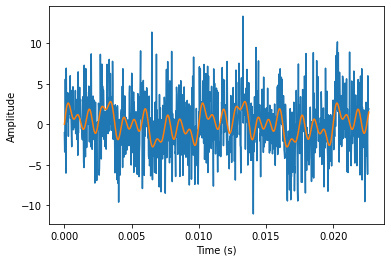

In [30]:
x1, tone1 = generate_sine_wave(700, SAMPLE_RATE, DURATION)
_, tone2 = generate_sine_wave(400, SAMPLE_RATE, DURATION)
_, tone3 = generate_sine_wave(100, SAMPLE_RATE, DURATION)
_, tone4 = generate_sine_wave(1200, SAMPLE_RATE, DURATION)
nice_tone = tone1 + tone2 + tone3 + tone4

noise_tone = np.random.randn(tone1.shape[0])
noise_tone = 3.5*noise_tone

mixed_tone = nice_tone + noise_tone


plt.plot(x1[0:1000], mixed_tone[0:1000])
plt.plot(x1[0:1000],nice_tone[0:1000])
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

/usr/local/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


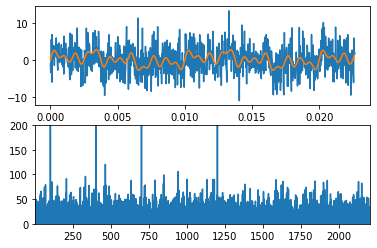

In [31]:
# Compute the FFT

n = x1.shape[0]
fhat = np.fft.fft(mixed_tone,n) # compute FFT
PSD = fhat * np.conj(fhat) /n # power spectrum per frequency
N = SAMPLE_RATE*DURATION
freq = fftfreq(N, 1/SAMPLE_RATE)
L = np.arange(1, np.floor(n/2), dtype='int')

fig, axs = plt.subplots(2,1)

plt.sca(axs[0])
plt.plot(x1[0:1000], mixed_tone[0:1000])
plt.plot(x1[0:1000], nice_tone[0:1000])

plt.sca(axs[1])
plt.plot(freq[L], PSD[L])
plt.xlim(freq[L[0]], freq[L[-1]]/10)
plt.ylim(0, 200)

plt.show()

/usr/local/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


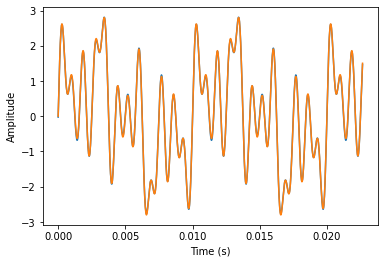

In [32]:
# Use the PSD to filter out noise

indices = PSD > 150
PSDclean = PSD * indices
fhat = indices * fhat
clean_signal = np.fft.ifft(fhat)

plt.plot(x1[0:1000], clean_signal[0:1000])
plt.plot(x1[0:1000],nice_tone[0:1000])
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()